In [1]:
# Library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#Import data ke Jupyter Notebook
data = pd.read_excel('data mentah1.xlsx')

In [3]:
#mengubah data dalam bentuk dataframe
df2 = pd.DataFrame(data)

In [26]:
data

,kota,usia
0,KEPULAUAN SELAYAR,53.0
1,KEPULAUAN SELAYAR,41.0
2,KEPULAUAN SELAYAR,70.0
3,KEPULAUAN SELAYAR,61.0
4,KEPULAUAN SELAYAR,58.0
...,...,...
2231,KOTA PALOPO,56.0
2232,KOTA PALOPO,86.0
2233,KOTA PALOPO,73.0
2234,KOTA PALOPO,72.0


In [4]:
# Mengecek dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kota    2236 non-null   object 
 1   usia    2208 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.1+ KB


In [5]:
# Mengahapus row data Null
df1 = df2.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kota    2208 non-null   object 
 1   usia    2208 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.8+ KB


In [28]:
# Mereset index dataframe
df = df1.reset_index(drop=True)
df

,kota,usia
0,KEPULAUAN SELAYAR,53.0
1,KEPULAUAN SELAYAR,41.0
2,KEPULAUAN SELAYAR,70.0
3,KEPULAUAN SELAYAR,61.0
4,KEPULAUAN SELAYAR,58.0
...,...,...
2203,KOTA PALOPO,56.0
2204,KOTA PALOPO,86.0
2205,KOTA PALOPO,73.0
2206,KOTA PALOPO,72.0


In [7]:
# label data usia menjadi kelompok usia
df['kelompok_usia'] = pd.cut(df['usia'], bins = [0, 5, 11, 16, 25, 35, 45, 55, 65, 200], labels = ['0(balita)', '1(kanak-kanak)', '2(remaja awal)','3(remaja akhir)', '4(dewasa awal)', '5(dewasa akhir)','6(lansia awal)', '7(lansia akhir)', '8(manula)'])
df['kelompok_usia_label'] = encoder.fit_transform(df['kelompok_usia'].astype(str))
df

,kota,usia,kelompok_usia,kelompok_usia_label
0,KEPULAUAN SELAYAR,53.0,6(lansia awal),6
1,KEPULAUAN SELAYAR,41.0,5(dewasa akhir),5
2,KEPULAUAN SELAYAR,70.0,8(manula),8
3,KEPULAUAN SELAYAR,61.0,7(lansia akhir),7
4,KEPULAUAN SELAYAR,58.0,7(lansia akhir),7
...,...,...,...,...
2203,KOTA PALOPO,56.0,7(lansia akhir),7
2204,KOTA PALOPO,86.0,8(manula),8
2205,KOTA PALOPO,73.0,8(manula),8
2206,KOTA PALOPO,72.0,8(manula),8


In [8]:
# label data kabupaten / kota 
df['kota_label'] = encoder.fit_transform(df['kota'].astype(str))
df

,kota,usia,kelompok_usia,kelompok_usia_label,kota_label
0,KEPULAUAN SELAYAR,53.0,6(lansia awal),6,7
1,KEPULAUAN SELAYAR,41.0,5(dewasa akhir),5,7
2,KEPULAUAN SELAYAR,70.0,8(manula),8,7
3,KEPULAUAN SELAYAR,61.0,7(lansia akhir),7,7
4,KEPULAUAN SELAYAR,58.0,7(lansia akhir),7,7
...,...,...,...,...,...
2203,KOTA PALOPO,56.0,7(lansia akhir),7,9
2204,KOTA PALOPO,86.0,8(manula),8,9
2205,KOTA PALOPO,73.0,8(manula),8,9
2206,KOTA PALOPO,72.0,8(manula),8,9


In [9]:
# Menyeleksi Data kabupaten/kota
df_kota = df.iloc[0::, [0,4]]
print(df_kota)

                   kota  kota_label
0     KEPULAUAN SELAYAR           7
1     KEPULAUAN SELAYAR           7
2     KEPULAUAN SELAYAR           7
3     KEPULAUAN SELAYAR           7
4     KEPULAUAN SELAYAR           7
...                 ...         ...
2203        KOTA PALOPO           9
2204        KOTA PALOPO           9
2205        KOTA PALOPO           9
2206        KOTA PALOPO           9
2207        KOTA PALOPO           9

[2208 rows x 2 columns]


In [10]:
# Menyeleksi Data kelompok usia
df_usia = df.iloc[0::, [2,3]]
print(df_usia)

        kelompok_usia  kelompok_usia_label
0      6(lansia awal)                    6
1     5(dewasa akhir)                    5
2           8(manula)                    8
3     7(lansia akhir)                    7
4     7(lansia akhir)                    7
...               ...                  ...
2203  7(lansia akhir)                    7
2204        8(manula)                    8
2205        8(manula)                    8
2206        8(manula)                    8
2207        8(manula)                    8

[2208 rows x 2 columns]


In [11]:
# Menyeleksi Data kabupaten/kota dan kelompok usia
df_full = df.iloc[0::, [4,3]]
print(df_full)

      kota_label  kelompok_usia_label
0              7                    6
1              7                    5
2              7                    8
3              7                    7
4              7                    7
...          ...                  ...
2203           9                    7
2204           9                    8
2205           9                    8
2206           9                    8
2207           9                    8

[2208 rows x 2 columns]


In [12]:
# Grouping data kabupaten/kota dan jumlah kasusnya
df_fix_kota = df_kota.groupby(['kota_label'])['kota_label'].count().reset_index(name='jumlah_kasus')
df_fix_kota

,kota_label,jumlah_kasus
0,0,28
1,1,15
2,2,15
3,3,55
4,4,46
5,5,120
6,6,58
7,7,41
8,8,1000
9,9,76


In [13]:
# Grouping Data kelompok usia dan Jumlah kasusnya
df_fix_usia = df_usia.groupby(['kelompok_usia_label'])['kelompok_usia_label'].count().reset_index(name='jumlah_kasus')
df_fix_usia

,kelompok_usia_label,jumlah_kasus
0,0,34
1,1,4
2,2,8
3,3,33
4,4,92
5,5,185
6,6,444
7,7,669
8,8,739


In [14]:
# Grouping data kabupaten/kota dan jumlah kasusnya
df_full_ = df_full.groupby(['kota_label','kelompok_usia_label'])['kelompok_usia_label'].count().reset_index(name='jumlah_kasus')
df_full_

,kota_label,kelompok_usia_label,jumlah_kasus
0,0,4,1
1,0,5,5
2,0,6,6
3,0,7,9
4,0,8,7
...,...,...,...
145,23,4,3
146,23,5,2
147,23,6,16
148,23,7,21


In [15]:
# export data sampel untuk perhitungan manual
df_kota.to_excel(r'D:\MyJupyterNB\data_hitung1.xlsx', index = False)
df_fix_usia.to_excel(r'D:\MyJupyterNB\data_hitung2.xlsx', index = False)
df_full_.to_excel(r'D:\MyJupyterNB\data_hitung3.xlsx', index = False)

    kota_label  jumlah_kasus  label1_kmeans
0            0            28              0
1            1            15              0
2            2            15              0
3            3            55              0
4            4            46              0
5            5           120              0
6            6            58              0
7            7            41              0
8            8          1000              1
9            9            76              0
10          10            85              0
11          11            10              0
12          12            49              0
13          13            89              0
14          14            45              0
15          15           102              0
16          16            93              0
17          17            22              0
18          18            52              0
19          19            63              0
20          20            53              0
21          21            24    

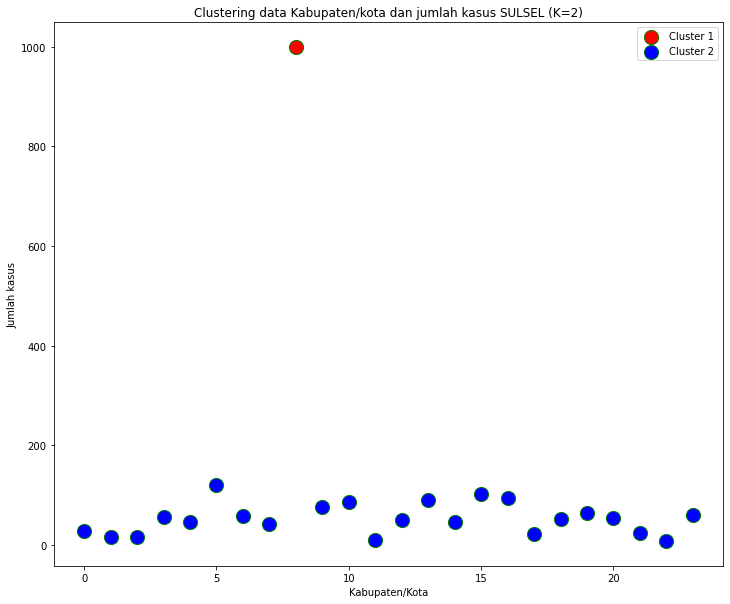

In [16]:
# Visualisasi sampel kabupaten/kota
kmeans1 = KMeans(n_clusters = 2, init='k-means++', random_state=0).fit(df_fix_kota)
labels1 = kmeans1.labels_
df_fix_kota['label1_kmeans'] = labels1
print(df_fix_kota)

fig = plt.figure(figsize=(12,10))
plt.scatter(df_fix_kota['kota_label'][df_fix_kota.label1_kmeans==1], df_fix_kota['jumlah_kasus'][df_fix_kota.label1_kmeans==1], c='red', s=200, edgecolors='green', label = 'Cluster 1')
plt.scatter(df_fix_kota['kota_label'][df_fix_kota.label1_kmeans==0], df_fix_kota['jumlah_kasus'][df_fix_kota.label1_kmeans==0], c='blue', s=200, edgecolors='green', label = 'Cluster 2')
 
plt.title('Clustering data Kabupaten/kota dan jumlah kasus SULSEL (K=2)')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah kasus')
plt.legend()
plt.show()

   kelompok_usia_label  jumlah_kasus  label2_kmeans
0                    0            34              0
1                    1             4              0
2                    2             8              0
3                    3            33              0
4                    4            92              0
5                    5           185              0
6                    6           444              1
7                    7           669              1
8                    8           739              1


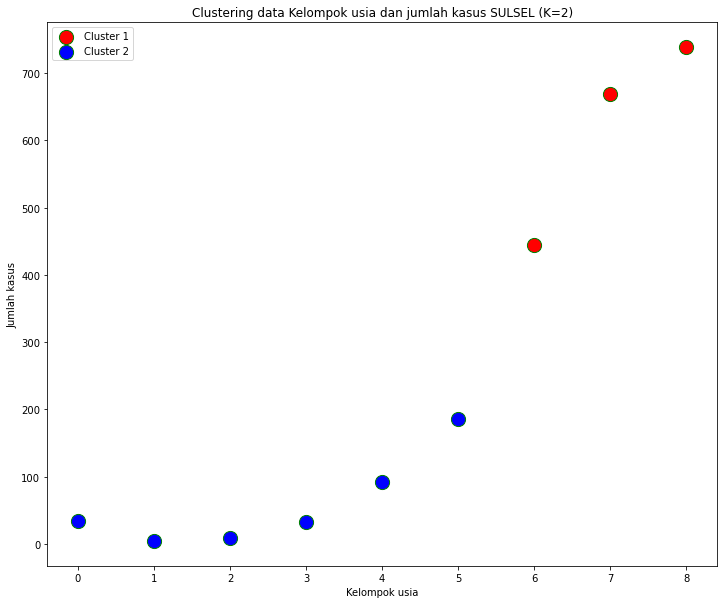

In [17]:
# Visualisasi sampel kelompok usia
kmeans2 = KMeans(n_clusters = 2, init='k-means++', random_state=0).fit(df_fix_usia)
labels2 = kmeans2.labels_
df_fix_usia['label2_kmeans'] = labels2
print(df_fix_usia)
fig = plt.figure(figsize=(12,10))

plt.scatter(df_fix_usia['kelompok_usia_label'][df_fix_usia.label2_kmeans==1], df_fix_usia['jumlah_kasus'][df_fix_usia.label2_kmeans==1], c='red', s=200, edgecolors='green', label = 'Cluster 1')
plt.scatter(df_fix_usia['kelompok_usia_label'][df_fix_usia.label2_kmeans==0], df_fix_usia['jumlah_kasus'][df_fix_usia.label2_kmeans==0], c='blue', s=200, edgecolors='green', label = 'Cluster 2')
 
plt.title('Clustering data Kelompok usia dan jumlah kasus SULSEL (K=2)')
plt.xlabel('Kelompok usia')
plt.ylabel('Jumlah kasus')
plt.legend()
plt.show()

     kota_label  kelompok_usia_label  jumlah_kasus  label3_kmeans
0             0                    4             1              0
1             0                    5             5              0
2             0                    6             6              0
3             0                    7             9              0
4             0                    8             7              0
..          ...                  ...           ...            ...
145          23                    4             3              0
146          23                    5             2              0
147          23                    6            16              0
148          23                    7            21              0
149          23                    8            16              0

[150 rows x 4 columns]


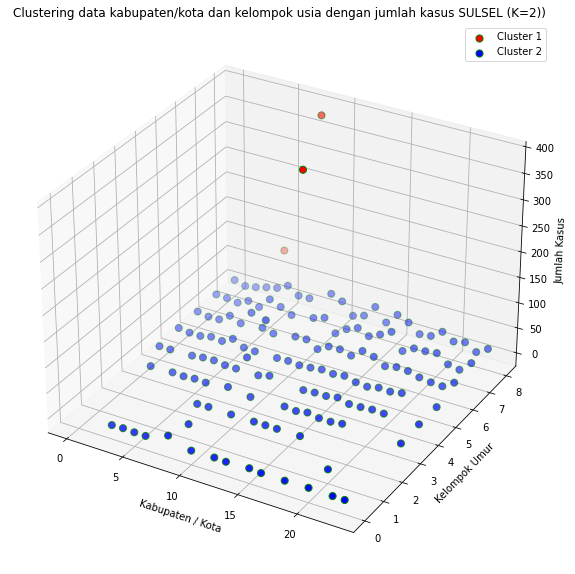

In [18]:
# Visualisasi sampel kabupaten / kota dan kelompok usia dengan jumlah kasusnya
kmeans3 = KMeans(n_clusters = 2, init='k-means++', random_state=0).fit(df_full_)
labels3 = kmeans3.labels_
df_full_['label3_kmeans'] = labels3
print(df_full_)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_full_['kota_label'][df_full_.label3_kmeans==1], df_full_['kelompok_usia_label'][df_full_.label3_kmeans==1], df_full_['jumlah_kasus'][df_full_.label3_kmeans==1], c='red', s=50, edgecolors='green',label = 'Cluster 1')
ax.scatter(df_full_['kota_label'][df_full_.label3_kmeans==0], df_full_['kelompok_usia_label'][df_full_.label3_kmeans==0], df_full_['jumlah_kasus'][df_full_.label3_kmeans==0], c='blue', s=50, edgecolors='green',label = 'Cluster 2')

plt.title('Clustering data kabupaten/kota dan kelompok usia dengan jumlah kasus SULSEL (K=2))')
plt.xlabel('Kabupaten / Kota')
plt.ylabel('Kelompok Umur')
ax.set_zlabel('Jumlah Kasus')
plt.legend()
plt.show()

In [19]:
print(df_full_.loc[df_full_['label3_kmeans']==1])

    kota_label  kelompok_usia_label  jumlah_kasus  label3_kmeans
55           8                    6           179              1
56           8                    7           306              1
57           8                    8           382              1


In [20]:
# Evalusasi cluster pada sampel data kabupaten / kota dan jumlah kasusnya
km1 = KMeans(n_clusters=4, random_state=0)
km1.fit_predict(df_fix_kota)
score = silhouette_score(df_fix_kota, km1.labels_)
print('Silhouetter Score : %.2f' % score)

Silhouetter Score : 0.54


In [21]:
# Evalusasi cluster pada sampel data kelompok usia
km2 = KMeans(n_clusters=4, random_state=0)
km2.fit_predict(df_fix_usia)
score = silhouette_score(df_fix_usia, km2.labels_)
print('Silhouetter Score : %.2f' % score)

Silhouetter Score : 0.54


In [22]:
# Evalusasi cluster pada sampel data kabupaten kota dan kelompok usia
km3 = KMeans(n_clusters=4, random_state=0)
km3.fit_predict(df_full_)
score = silhouette_score(df_full_, km3.labels_)
print('Silhouetter Score : %.2f' % score)

Silhouetter Score : 0.46


    kota_label  jumlah_kasus  label1_kmeans  label4_kmeans
0            0            28              0              0
1            1            15              0              0
2            2            15              0              0
3            3            55              0              0
4            4            46              0              0
5            5           120              0              2
6            6            58              0              0
7            7            41              0              0
8            8          1000              1              1
9            9            76              0              2
10          10            85              0              2
11          11            10              0              0
12          12            49              0              0
13          13            89              0              2
14          14            45              0              0
15          15           102              0             

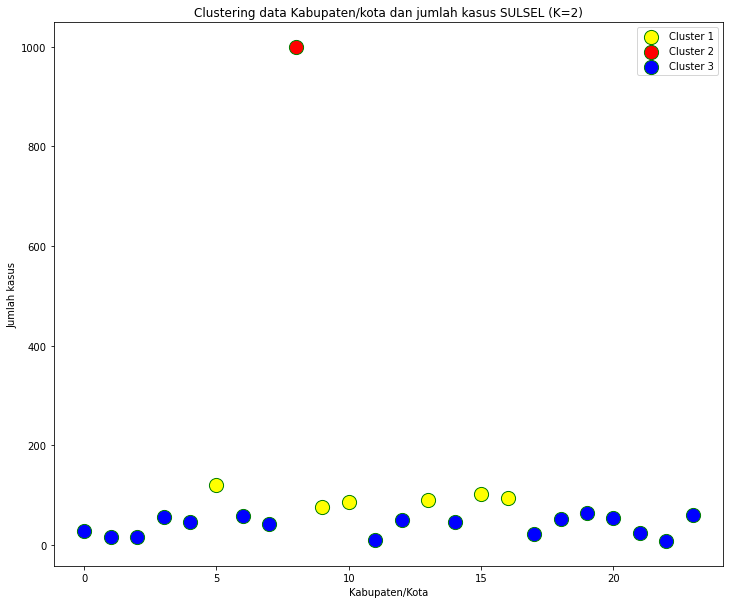

In [23]:
# Visualisasi sampel kabupaten/kota
kmeans4 = KMeans(n_clusters = 3, init='k-means++', random_state=0).fit(df_fix_kota)
labels4 = kmeans4.labels_
df_fix_kota['label4_kmeans'] = labels4
print(df_fix_kota)

fig = plt.figure(figsize=(12,10))
plt.scatter(df_fix_kota['kota_label'][df_fix_kota.label4_kmeans==2], df_fix_kota['jumlah_kasus'][df_fix_kota.label4_kmeans==2], c='yellow', s=200, edgecolors='green', label = 'Cluster 1')
plt.scatter(df_fix_kota['kota_label'][df_fix_kota.label4_kmeans==1], df_fix_kota['jumlah_kasus'][df_fix_kota.label4_kmeans==1], c='red', s=200, edgecolors='green', label = 'Cluster 2')
plt.scatter(df_fix_kota['kota_label'][df_fix_kota.label4_kmeans==0], df_fix_kota['jumlah_kasus'][df_fix_kota.label4_kmeans==0], c='blue', s=200, edgecolors='green', label = 'Cluster 3')
 
plt.title('Clustering data Kabupaten/kota dan jumlah kasus SULSEL (K=2)')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah kasus')
plt.legend()
plt.show()

   kelompok_usia_label  jumlah_kasus  label2_kmeans  label5_kmeans
0                    0            34              0              0
1                    1             4              0              0
2                    2             8              0              0
3                    3            33              0              0
4                    4            92              0              0
5                    5           185              0              0
6                    6           444              1              2
7                    7           669              1              1
8                    8           739              1              1


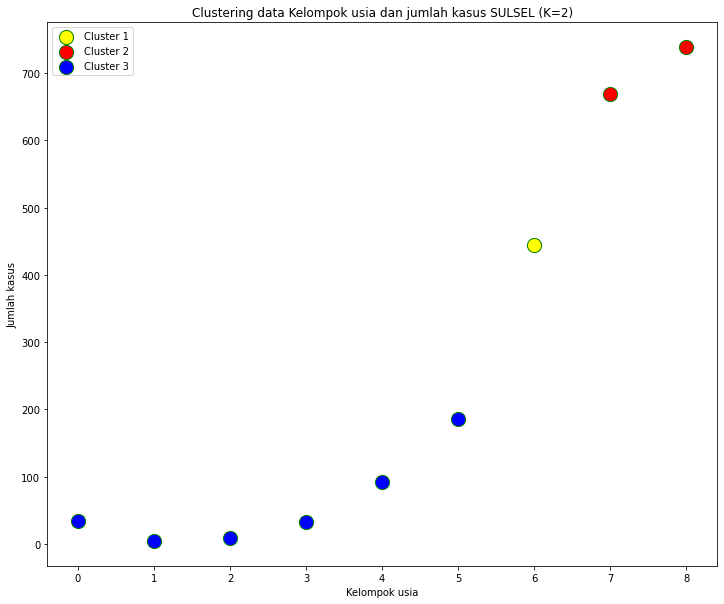

In [24]:
# Visualisasi sampel kelompok usia
kmeans5 = KMeans(n_clusters = 3, init='k-means++', random_state=0).fit(df_fix_usia)
labels5 = kmeans5.labels_
df_fix_usia['label5_kmeans'] = labels5
print(df_fix_usia)
fig = plt.figure(figsize=(12,10))

plt.scatter(df_fix_usia['kelompok_usia_label'][df_fix_usia.label5_kmeans==2], df_fix_usia['jumlah_kasus'][df_fix_usia.label5_kmeans==2], c='yellow', s=200, edgecolors='green', label = 'Cluster 1')
plt.scatter(df_fix_usia['kelompok_usia_label'][df_fix_usia.label5_kmeans==1], df_fix_usia['jumlah_kasus'][df_fix_usia.label5_kmeans==1], c='red', s=200, edgecolors='green', label = 'Cluster 2')
plt.scatter(df_fix_usia['kelompok_usia_label'][df_fix_usia.label5_kmeans==0], df_fix_usia['jumlah_kasus'][df_fix_usia.label5_kmeans==0], c='blue', s=200, edgecolors='green', label = 'Cluster 3')
 
plt.title('Clustering data Kelompok usia dan jumlah kasus SULSEL (K=2)')
plt.xlabel('Kelompok usia')
plt.ylabel('Jumlah kasus')
plt.legend()
plt.show()

     kota_label  kelompok_usia_label  jumlah_kasus  label3_kmeans  \
0             0                    4             1              0   
1             0                    5             5              0   
2             0                    6             6              0   
3             0                    7             9              0   
4             0                    8             7              0   
..          ...                  ...           ...            ...   
145          23                    4             3              0   
146          23                    5             2              0   
147          23                    6            16              0   
148          23                    7            21              0   
149          23                    8            16              0   

     label6_kmeans  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
145              0  
146

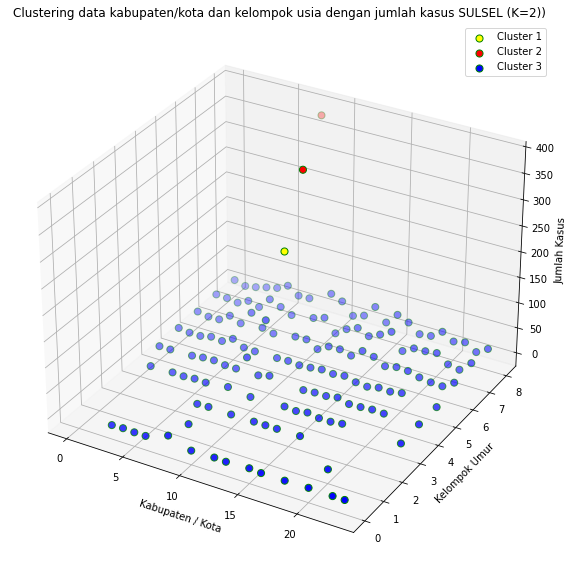

In [25]:
# Visualisasi sampel kabupaten / kota dan kelompok usia dengan jumlah kasusnya
kmeans6 = KMeans(n_clusters = 3, init='k-means++', random_state=0).fit(df_full_)
labels6 = kmeans6.labels_
df_full_['label6_kmeans'] = labels6
print(df_full_)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_full_['kota_label'][df_full_.label6_kmeans==2], df_full_['kelompok_usia_label'][df_full_.label6_kmeans==2], df_full_['jumlah_kasus'][df_full_.label6_kmeans==2], c='yellow', s=50, edgecolors='green',label = 'Cluster 1')
ax.scatter(df_full_['kota_label'][df_full_.label6_kmeans==1], df_full_['kelompok_usia_label'][df_full_.label6_kmeans==1], df_full_['jumlah_kasus'][df_full_.label6_kmeans==1], c='red', s=50, edgecolors='green',label = 'Cluster 2')
ax.scatter(df_full_['kota_label'][df_full_.label6_kmeans==0], df_full_['kelompok_usia_label'][df_full_.label6_kmeans==0], df_full_['jumlah_kasus'][df_full_.label6_kmeans==0], c='blue', s=50, edgecolors='green',label = 'Cluster 3')

plt.title('Clustering data kabupaten/kota dan kelompok usia dengan jumlah kasus SULSEL (K=2))')
plt.xlabel('Kabupaten / Kota')
plt.ylabel('Kelompok Umur')
ax.set_zlabel('Jumlah Kasus')
plt.legend()
plt.show()